In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import skimage
import sklearn

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

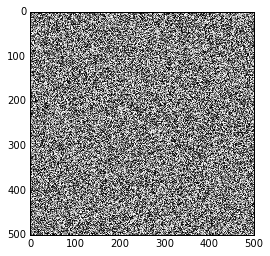

In [5]:
random_image = np.random.random([500,500])
plt.imshow(random_image,cmap = 'gray', interpolation = 'nearest')

(<type 'numpy.ndarray'>, dtype('uint8'), (303L, 384L))


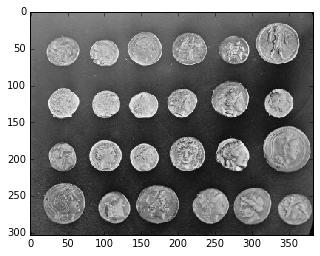

In [8]:
# real-world image
from skimage import data
coins = data.coins()

print(type(coins), coins.dtype, coins.shape)
plt.imshow(coins, cmap = 'gray', interpolation = 'nearest')


('Shape:', (300L, 451L, 3L))
('Values min/max:', 0, 231)
uint8


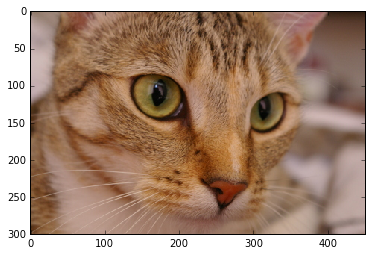

In [12]:
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat, interpolation='nearest');
print(cat.dtype)

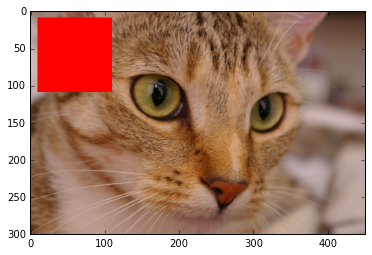

In [10]:
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat);

('Linear0:', dtype('float64'), 0.0, 1.0)
('Linear1:', dtype('uint8'), 0, 255)


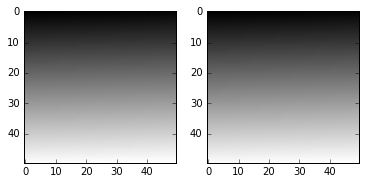

In [13]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

In [14]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_float = img_as_float(image)
image_ubyte = img_as_ubyte(image)

print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())

print("231/255 =", 231/255.)

('type, min, max:', dtype('float64'), 0.0, 0.90588235294117647)
('type, min, max:', dtype('uint8'), 0, 231)
('231/255 =', 0.9058823529411765)


In [15]:
from skimage import data

image = data.camera()

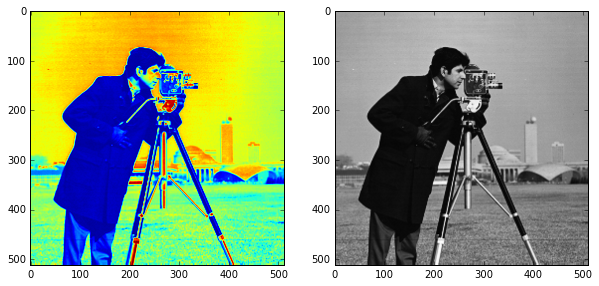

In [16]:
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize=(10, 5))

ax_jet.imshow(image, cmap='jet')
ax_gray.imshow(image, cmap='gray');

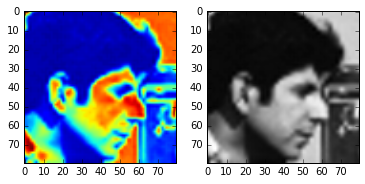

In [17]:
face = image[80:160, 200:280]
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2)
ax_jet.imshow(face, cmap='jet')
ax_gray.imshow(face, cmap='gray');

NameError: global name 'R' is not defined

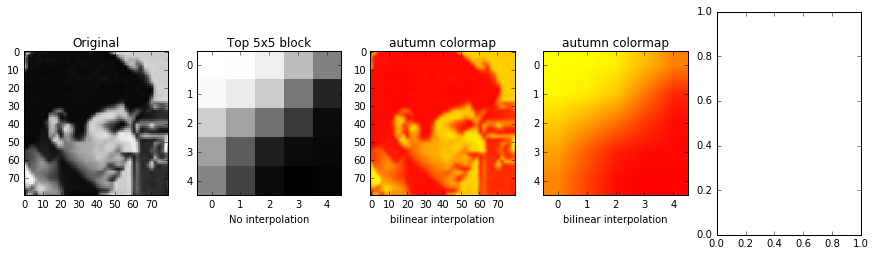

In [18]:
from IPython.html.widgets import interact, fixed
from matplotlib import cm as colormaps
import matplotlib.colors
import inspect

@interact(image=fixed(face),
          cmap=sorted([c for c in dir(colormaps)
                       if not c.endswith('_r') and
                          isinstance(getattr(colormaps, c),
                                     matplotlib.colors.Colormap)],
                      key=lambda x: x.lower()),
          reverse_cmap=False,
          interpolation=['nearest', 'bilinear', 'bicubic',
                         'spline16', 'spline36', 'hanning', 'hamming',
                         'hermite', 'kaiser', 'quadric', 'catrom',
                         'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'])
def imshow_params(image, cmap='jet', reverse_cmap=False, interpolation='bicubic'):
    fig, axes = plt.subplots(1, 5, figsize=(15, 4))

    if reverse_cmap:
        cmap = cmap + '_r'

    axes[0].imshow(image, cmap='gray', interpolation='nearest')
    axes[0].set_title('Original')

    axes[1].imshow(image[:5, :5], cmap='gray', interpolation='nearest')
    axes[1].set_title('Top 5x5 block')
    axes[1].set_xlabel('No interpolation')

    axes[2].imshow(image, cmap=cmap, interpolation=interpolation)
    axes[2].set_title('%s colormap' % cmap)
    axes[2].set_xlabel('%s interpolation' % interpolation)

    axes[3].imshow(image[:5, :5], cmap=cmap, interpolation=interpolation)
    axes[3].set_title('%s colormap' % cmap)
    axes[3].set_xlabel('%s interpolation' % interpolation)

    axes[4].imshow(R, cmap=cmap, interpolation=interpolation)
    axes[4].set_title('%s colormap' % cmap)
    axes[4].set_xlabel('%s interpolation' % interpolation)

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

In [19]:
from skimage import io

image = io.imread('../../images/balloon.jpg')

print(type(image))
plt.imshow(image);

IOError: [Errno 2] No such file or directory: '../../images/balloon.jpg'